# **Problem 1a**

In [ ]:
#importing libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time

In [ ]:
#checking if gpu is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu"=')
print(device)

cuda


In [ ]:
#define the CNN model
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.conv1 = nn.Conv2d(3,32, kernel_size=3, padding=1) #first conv layer with 32 output channels, 3x3 kernel, and padding of 1
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) #second conv layer with 64 output channels, 3x3 kernel, and padding of 1
    self.pool = nn.MaxPool2d(2, 2) #max pooling layer with 2x2
    self.fc1 = nn.Linear(64 * 8 *8, 512) #adjust fully connected layer based on feature dimensions
    self.fc2 = nn.Linear(512, 10) #output layer with 10 classes (CIFAR10)

  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x))) # apply first conv layer, followed by ReLU and max pooling
    x = self.pool(torch.relu(self.conv2(x))) # apply second conv layer, followed by ReLU and max pooling
    x = x.view(-1, 64 * 8 *8) #flatten the tensor for fully connected layers
    x = torch.relu(self.fc1(x)) #apply first fully connected layer with ReLu activation
    x = self.fc2(x) #output layer
    return x

In [ ]:
#define transforms for data augmentation and normalization
transform = transforms.Compose([
  transforms.RandomHorizontalFlip(), #randomly flip images horizontally
  transforms.RandomCrop(32, padding=4), # randomly crop images with padding of 4
  transforms.ToTensor(), # convert images to torch tensor
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #normalize images with mean and std of 0.5
])

In [ ]:
#load CIFAR10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#initialize the model, loss function, and optimizer
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss() #cross-entropy for classification
optimizer = optim.Adam(model.parameters(), lr=0.001) #adam optimizer

In [ ]:
#train the model
start_time = time.time()
epochs = 200
for epoch in range(epochs):
  model.train() # set the model to trianing mode
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(trainloader, 0):
    inputs, labels = inputs.to(device), labels.to(device) #move data to device

    optimizer.zero_grad() #zero the parameter gradient

    #forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    #backward pass and optimization
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print(f'"[Epoch {epoch+1}/{epochs}] Loss: {running_loss/len(trainloader):.4f}')

training_time = time.time() - start_time
print(f'Training completed in {training_time / 60:.2f} minutes')

"[Epoch 1/200] Loss: 1.5534
"[Epoch 2/200] Loss: 1.2169
"[Epoch 3/200] Loss: 1.0687
"[Epoch 4/200] Loss: 0.9716
"[Epoch 5/200] Loss: 0.9068
"[Epoch 6/200] Loss: 0.8544
"[Epoch 7/200] Loss: 0.8140
"[Epoch 8/200] Loss: 0.7777
"[Epoch 9/200] Loss: 0.7458
"[Epoch 10/200] Loss: 0.7234
"[Epoch 11/200] Loss: 0.6950
"[Epoch 12/200] Loss: 0.6740
"[Epoch 13/200] Loss: 0.6592
"[Epoch 14/200] Loss: 0.6443
"[Epoch 15/200] Loss: 0.6268
"[Epoch 16/200] Loss: 0.6125
"[Epoch 17/200] Loss: 0.6008
"[Epoch 18/200] Loss: 0.5869
"[Epoch 19/200] Loss: 0.5688
"[Epoch 20/200] Loss: 0.5655
"[Epoch 21/200] Loss: 0.5490
"[Epoch 22/200] Loss: 0.5381
"[Epoch 23/200] Loss: 0.5294
"[Epoch 24/200] Loss: 0.5212
"[Epoch 25/200] Loss: 0.5120
"[Epoch 26/200] Loss: 0.5043
"[Epoch 27/200] Loss: 0.4925
"[Epoch 28/200] Loss: 0.4832
"[Epoch 29/200] Loss: 0.4798
"[Epoch 30/200] Loss: 0.4700
"[Epoch 31/200] Loss: 0.4652
"[Epoch 32/200] Loss: 0.4616
"[Epoch 33/200] Loss: 0.4567
"[Epoch 34/200] Loss: 0.4494
"[Epoch 35/200] Loss: 0

In [ ]:
#evaluate the model
model.eval()  #set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  #disable gradient calculation for evaluation
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)  #get class with highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

#calculate and print evaluation accuracy
evaluation_accuracy = 100 * correct / total
print(f'Accuracy of the model on the test set: {evaluation_accuracy:.2f}%')

#report final results
print(f'Final Training Time: {training_time / 60:.2f} minutes')
print(f'Final Evaluation Accuracy: {evaluation_accuracy:.2f}%')

Accuracy of the model on the test set: 79.45%
Final Training Time: 78.23 minutes
Final Evaluation Accuracy: 79.45%


# **Problem 1b**

In [ ]:
class ExtendedCNN(nn.Module):
  def __init__(self):
    super(ExtendedCNN, self).__init__()
    self.conv1 = nn.Conv2d(3,32, kernel_size=3, padding=1) #first conv layer with 32 output channels, 3x3 kernel, and padding of 1
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) #second conv layer with 64 output channels, 3x3 kernel, and padding of 1
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1) #third conv layer with 128 output channels, 3x3 kernel, and padding of 1
    self.pool = nn.MaxPool2d(2, 2) #max pooling layer with 2x2
    self.dropout = nn.Dropout(0.5) #dropout layer to reduce overfitting
    self.fc1 = nn.Linear(128 * 4 * 4, 512) #adjust fully connected layer based on feature dimensions
    self.fc2 = nn.Linear(512, 10) #output layer with 10 classes (CIFAR10)

  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x))) # apply first conv layer, followed by ReLU and max pooling
    x = self.pool(torch.relu(self.conv2(x))) # apply second conv layer, followed by ReLU and max pooling
    x = self.pool(torch.relu(self.conv3(x))) # apply third conv layer, followed by ReLU and max pooling
    x = x.view(-1, 128 * 4 *4) #flatten the tensor for fully connected layers
    x = torch.relu(self.fc1(x)) #apply first fully connected layer with ReLu activation
    x = self.dropout(x) #apply dropout
    x = self.fc2(x) #output layer
    return x

In [ ]:
#initialize the model, loss function, and optimizer
model = ExtendedCNN().to(device)
criterion = nn.CrossEntropyLoss() #cross-entropy for classification
optimizer = optim.Adam(model.parameters(), lr=0.001) #adam optimizer

In [ ]:
#train the model
start_time = time.time()
epochs = 200
for epoch in range(epochs):
  model.train() # set the model to trianing mode
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(trainloader, 0):
    inputs, labels = inputs.to(device), labels.to(device) #move data to device

    optimizer.zero_grad() #zero the parameter gradient

    #forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    #backward pass and optimization
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print(f'"[Epoch {epoch+1}/{epochs}] Loss: {running_loss/len(trainloader):.4f}')

training_time = time.time() - start_time
print(f'Training completed in {training_time / 60:.2f} minutes')

#evaluate the model
model.eval()  #set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  #disable gradient calculation for evaluation
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)  #get class with highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

#calculate and print evaluation accuracy
evaluation_accuracy = 100 * correct / total
print(f'Accuracy of the model on the test set: {evaluation_accuracy:.2f}%')

#report final results
print(f'Final Training Time: {training_time / 60:.2f} minutes')
print(f'Final Evaluation Accuracy: {evaluation_accuracy:.2f}%')

"[Epoch 1/200] Loss: 1.6710
"[Epoch 2/200] Loss: 1.3077
"[Epoch 3/200] Loss: 1.1327
"[Epoch 4/200] Loss: 1.0243
"[Epoch 5/200] Loss: 0.9384
"[Epoch 6/200] Loss: 0.8769
"[Epoch 7/200] Loss: 0.8347
"[Epoch 8/200] Loss: 0.7962
"[Epoch 9/200] Loss: 0.7645
"[Epoch 10/200] Loss: 0.7449
"[Epoch 11/200] Loss: 0.7170
"[Epoch 12/200] Loss: 0.6987
"[Epoch 13/200] Loss: 0.6744
"[Epoch 14/200] Loss: 0.6640
"[Epoch 15/200] Loss: 0.6500
"[Epoch 16/200] Loss: 0.6314
"[Epoch 17/200] Loss: 0.6195
"[Epoch 18/200] Loss: 0.6081
"[Epoch 19/200] Loss: 0.6019
"[Epoch 20/200] Loss: 0.5907
"[Epoch 21/200] Loss: 0.5836
"[Epoch 22/200] Loss: 0.5729
"[Epoch 23/200] Loss: 0.5660
"[Epoch 24/200] Loss: 0.5561
"[Epoch 25/200] Loss: 0.5496
"[Epoch 26/200] Loss: 0.5441
"[Epoch 27/200] Loss: 0.5417
"[Epoch 28/200] Loss: 0.5318
"[Epoch 29/200] Loss: 0.5227
"[Epoch 30/200] Loss: 0.5143
"[Epoch 31/200] Loss: 0.5099
"[Epoch 32/200] Loss: 0.5109
"[Epoch 33/200] Loss: 0.4982
"[Epoch 34/200] Loss: 0.4984
"[Epoch 35/200] Loss: 0

# Problem **2**

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm
import matplotlib.pyplot as plt

In [50]:
#checking if gpu is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu"=')
print(device)

cuda


In [51]:
class BasicBlock(nn.Module):
  def __init__(self, in_channels, out_channels, stride=1):
    super(BasicBlock, self).__init__()
    #first conv layer in the block
    self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
    self.bn1 = nn.BatchNorm2d(out_channels) # batch normalization
    #second conv layer in the block
    self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
    self.bn2 = nn.BatchNorm2d(out_channels) #batch normalization

    #define shortcut connection to match dimensions when necessary
    self.shortcut = nn.Sequential()
    if stride != 1 or in_channels != out_channels:
      self.shortcut = nn.Sequential(
          nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False), #1x1 conv for shortcut
          nn.BatchNorm2d(out_channels) #batch normalization for shortcut
      )
  def forward(self, x):
    out = torch.relu(self.bn1(self.conv1(x))) #forward pass through the first conv, batch norm, relu
    out = self.bn2(self.conv2(out)) #forward pass through the second conv and batch norm
    #add shortcut connection and apply relu
    out += self.shortcut(x)
    out = torch.relu(out)
    return out

In [52]:
#define the resnet model
class ResNet10(nn.Module):
  def __init__(self, num_classes=10):
    super(ResNet10, self).__init__()
    self.in_channels = 64
    #initial conv layer
    self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
    self.bn1 = nn.BatchNorm2d(64) #batch normalization
    #define residual blocks
    self.layer1 = self.make_layer(64, 2, stride=1)
    self.layer2 = self.make_layer(128, 2, stride=2)
    self.layer3 = self.make_layer(256, 2, stride=2)
    self.layer4 = self.make_layer(512, 2, stride=2)
    # dropout layer
    self.dropout = nn.Dropout(0.5)
    #final fully connected layer
    self.fc = nn.Linear(512, num_classes)
  def make_layer(self, out_channels, blocks, stride):
    #creating layer consisiting of multiple block
    strides = [stride] + [1] * (blocks - 1)
    layers = []
    for stride in strides:
      layers.append(BasicBlock(self.in_channels, out_channels, stride))
      self.in_channels = out_channels
    return nn.Sequential(*layers)

  def forward(self, x):
    #forward pass through the initial conv, batch normal, and relu
    out = torch.relu(self.bn1(self.conv1(x)))
    #forward pass through the residual blocks
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    #average pooling to reduce spatial dimensions
    out = torch.nn.functional.avg_pool2d(out, 4)
    out = out.view(out.size(0), -1) #flatten the output for the fully connected layer
    out = self.dropout(out) #apply dropout
    out = self.fc(out) # forward pass thorugh the fully connected layer for classification
    return out

In [54]:
#define transforms for data augmentation and normalization
transform = transforms.Compose([
  transforms.RandomHorizontalFlip(), #randomly flip images horizontally
  transforms.RandomCrop(32, padding=4), # randomly crop images with padding of 4
  transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), #adding color jitter for more augmentation
  transforms.ToTensor(), # convert images to torch tensor
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #normalize images with mean and std of 0.5
])

In [55]:
#load CIFAR10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=256, shuffle=True, num_workers=4)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=256, shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [65]:
#initialize the model, loss function, and optimizer
model = torch.nn.DataParallel(ResNet10().to(device))
criterion = nn.CrossEntropyLoss() #cross-entropy for classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4) #adam optimizer, and L2 regularization
scaler = GradScaler() # mixed precision training

<ipython-input-65-a230775c3862>:5: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() # mixed precision training


Epoch [1/20]:   0%|          | 0/196 [00:00<?, ?it/s]<ipython-input-66-3c337a36d2b0>:18: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch [1/20], Loss: 1.6665, Training Accuracy: 47.39%
Validation Accuracy after Epoch [1/20]: 47.16%


Epoch [2/20], Loss: 1.1328, Training Accuracy: 62.01%
Validation Accuracy after Epoch [2/20]: 61.76%


Epoch [3/20], Loss: 0.8805, Training Accuracy: 69.59%
Validation Accuracy after Epoch [3/20]: 68.80%


Epoch [4/20], Loss: 0.7347, Training Accuracy: 74.15%
Validation Accuracy after Epoch [4/20]: 72.55%


Epoch [5/20], Loss: 0.6437, Training Accuracy: 76.91%
Validation Accuracy after Epoch [5/20]: 75.58%


Epoch [6/20], Loss: 0.5820, Training Accuracy: 75.38%
Validation Accuracy after Epoch [6/20]: 73.88%


Epoch [7/20], Loss: 0.5236, Training Accuracy: 79.73%
Validation Accuracy after Epoch [7/20]: 77.52%


Epoch [8/20], Loss: 0.4852, Training Accuracy: 79.16%
Validation Accuracy after Epoch [8/20]: 77.29%


Epoch [9/20], Loss: 0.4546, Training Accuracy: 85.04%
Validation Accuracy after Epoch [9/20]: 83.27%


Epoch [10/20], Loss: 0.4288, Training Accuracy: 83.87%
Validation Accuracy after Epoch [10/20]: 82.25%


Epoch [11/20], Loss: 0.3958, Training Accuracy: 85.50%
Validation Accuracy after Epoch [11/20]: 83.19%


Epoch [12/20], Loss: 0.3850, Training Accuracy: 87.73%
Validation Accuracy after Epoch [12/20]: 85.40%


Epoch [13/20], Loss: 0.3572, Training Accuracy: 84.94%
Validation Accuracy after Epoch [13/20]: 82.01%


Epoch [14/20], Loss: 0.3435, Training Accuracy: 87.24%
Validation Accuracy after Epoch [14/20]: 84.00%


Epoch [15/20], Loss: 0.3242, Training Accuracy: 88.31%
Validation Accuracy after Epoch [15/20]: 85.30%


Epoch [16/20], Loss: 0.3081, Training Accuracy: 88.43%
Validation Accuracy after Epoch [16/20]: 85.02%


Epoch [17/20], Loss: 0.3032, Training Accuracy: 86.73%
Validation Accuracy after Epoch [17/20]: 83.56%


Epoch [18/20], Loss: 0.2815, Training Accuracy: 90.85%
Validation Accuracy after Epoch [18/20]: 87.35%


Epoch [19/20], Loss: 0.2685, Training Accuracy: 90.74%
Validation Accuracy after Epoch [19/20]: 86.59%


Epoch [20/20], Loss: 0.2609, Training Accuracy: 91.05%
Validation Accuracy after Epoch [20/20]: 86.98%
Training completed in 88.50 minutes


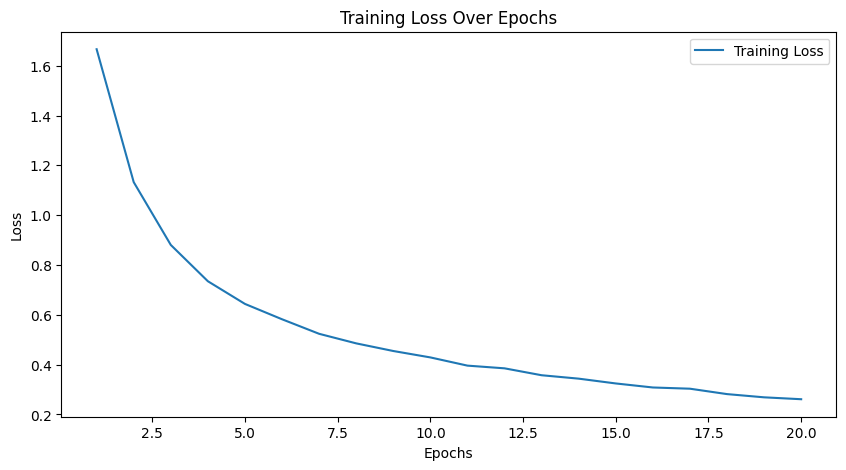

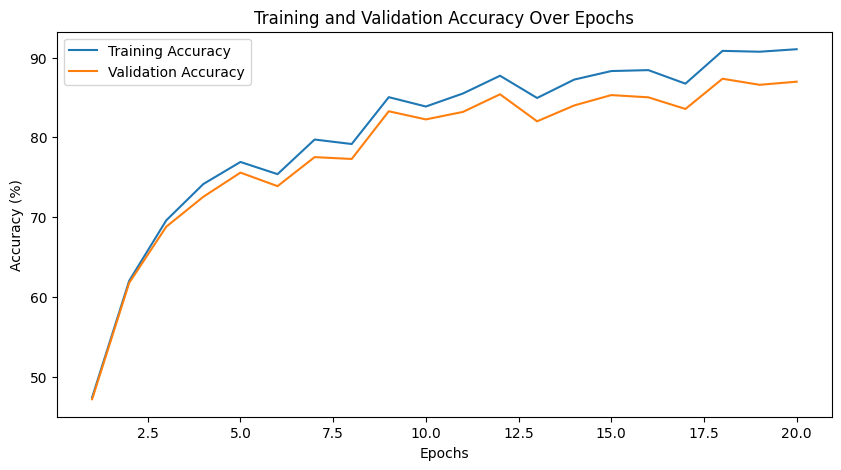

In [66]:
#training
start_time = time.time()
epochs = 20
train_losses = []
train_accuracies = []
val_accuracies = []
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    progress_bar = tqdm(trainloader, desc=f'Epoch [{epoch + 1}/{epochs}]', leave=False)
    for i, (inputs, labels) in enumerate(progress_bar):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Mixed precision forward pass
        with autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)  # Calculate loss
        # Backward pass and optimize with gradient scaling
        scaler.scale(loss).backward()  # Compute scaled gradients
        scaler.step(optimizer)  #update parameters
        scaler.update()  #update the scale for next iteration

        running_loss += loss.item()
        progress_bar.set_postfix(loss=running_loss / (i + 1))

    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)

    # calculate training accuracy for the epoch
    correct_train = 0
    total_train = 0
    model.eval()  # set the model to evaluation mode for accuracy calculation
    with torch.no_grad():
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)  #forward pass through the model
            _, predicted = torch.max(outputs.data, 1)  #get class with highest probability
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%')

    #evaluate the model on the validation set after each epoch
    model.eval()  #set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  #disable gradient calculation for evaluation
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)  #forward pass through the model
            _, predicted = torch.max(outputs.data, 1)  #get class with highest probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    print(f'Validation Accuracy after Epoch [{epoch + 1}/{epochs}]: {val_accuracy:.2f}%')

training_time = time.time() - start_time
print(f'Training completed in {training_time / 60:.2f} minutes')

#plot training loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

#plot training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()
